In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.facecolor'] = 'w'
plt.style.use(['dark_background', 'science', 'notebook'])

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [108]:
# generate data
def function(x):
    return -1 + 5*x - 25*x**2 + 2*x**3

df = pd.DataFrame()
n_samples = 20
xmin, xmax = -5, 15
np.random.seed(42)
df['x'] = np.random.uniform(low=xmin, high=xmax, size=(n_samples,))
df['y'] = function(df['x']) + np.random.uniform(-100,100, size=(n_samples,))
X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

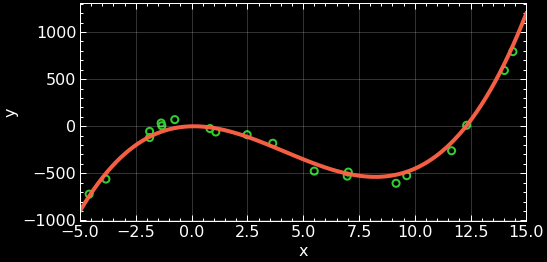

In [109]:
fig, ax = plt.subplots(figsize=(8, 4))
# ymin, ymax = -10, 20
x = np.linspace(xmin, xmax, 100)

ax.plot(x, function(x), c='tomato', lw=4, alpha=0.96, )
ax.scatter(X, Y, s=50, ec='limegreen', fc='none', lw=2)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax])#, ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y_znorm = scaler.fit_transform(Y)

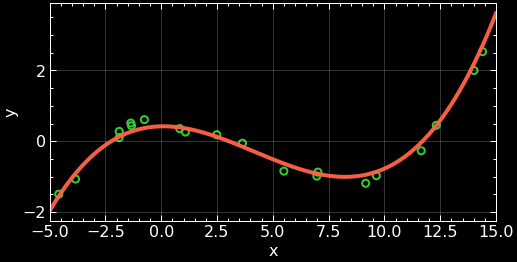

In [112]:
fig, ax = plt.subplots(figsize=(8, 4))
# ymin, ymax = -10, 20
x = np.linspace(xmin, xmax, 100)

ax.plot(x, (function(x)-scaler.mean_)/scaler.scale_, c='tomato', lw=4, alpha=0.96, )
ax.scatter(X, Y_znorm, s=50, ec='limegreen', fc='none', lw=2)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax])#, ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [113]:
kernel = RBF(length_scale=1, length_scale_bounds=(1e-3, 1e3))
model = GaussianProcessRegressor(kernel=kernel)
model.fit(X, Y_znorm)

GaussianProcessRegressor(kernel=RBF(length_scale=1))

In [114]:
x_axis = np.linspace(xmin, xmax, 100).reshape(-1, 1)
yhat, sigma = model.predict(x_axis, return_std=True)

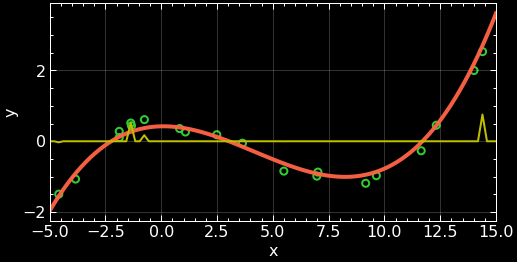

In [115]:
fig, ax = plt.subplots(figsize=(8, 4))
# ymin, ymax = -10, 20
x = np.linspace(xmin, xmax, 100)

ax.plot(x, (function(x)-scaler.mean_)/scaler.scale_, c='tomato', lw=4, alpha=0.96, )
ax.scatter(X, Y_znorm, s=50, ec='limegreen', fc='none', lw=2)
ax.plot(x_axis, yhat, c='y', lw=2)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax])#, ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)